In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random
import os
import torch
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

#### The Data

In [3]:
#df = pd.read_csv('../../data/anemia_synth_dataset_some_nans_unspecified_more_feats.csv')
#df = pd.read_csv('../../data/more_feats_0.2.csv')
#df= pd.read_csv('../../data/more_features/more_feats_new_labels_0.1.csv')
#df =pd.read_csv('../../data/more_features/more_feats_new_labels_0.1_noisy_0.6.csv')
df = pd.read_csv('../../data/more_features/more_feats_correlated_missing_3.csv')
#df = utils.balance_dataset(df, 8000)
df = df.fillna(-1)
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,11.183192,187.573466,4.951674,-1.000000,316.593436,-1.000000,-1.000000,3.531295,1,-1.000000,-1.000000,96.721542,49.530542,23.186628,-1.0,-1.000000,57.247868,Hemolytic anemia
1,14.387445,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,125.249617,-1.000000,1,-1.000000,98.357508,112.758764,62.464566,7.168920,-1.0,-1.000000,-1.000000,No anemia
2,12.749357,-1.000000,-1.000000,6.179371,498.418768,76.759285,-1.000000,4.982859,1,1.022939,-1.000000,75.739552,72.072041,20.600875,-1.0,38.248071,32.068372,Iron deficiency anemia
3,11.508870,197.180945,1.200125,-1.000000,457.033309,102.900301,131.177927,3.355346,1,-1.000000,-1.000000,66.999185,18.353272,-1.000000,-1.0,34.526609,28.702050,Unspecified anemia
4,9.456656,427.952052,-1.000000,0.660252,-1.000000,104.543774,-1.000000,2.713693,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,28.369968,-1.000000,Vitamin B12/Folate deficiency anemia


In [4]:
df.isna().sum()

hemoglobin               0
ferritin                 0
ret_count                0
segmented_neutrophils    0
tibc                     0
mcv                      0
serum_iron               0
rbc                      0
gender                   0
creatinine               0
cholestrol               0
copper                   0
ethanol                  0
folate                   0
glucose                  0
hematocrit               0
tsat                     0
label                    0
dtype: int64

In [5]:
utils.get_dt_performance(df)

(0.7770714285714285,
 0.7458343221135431,
 0.8570010394453483,
 datetime.timedelta(microseconds=7504))

In [6]:
df.label.value_counts()

No anemia                               10000
Anemia of chronic disease                9756
Iron deficiency anemia                   9267
Unspecified anemia                       9033
Aplastic anemia                          9020
Vitamin B12/Folate deficiency anemia     9000
Hemolytic anemia                         8976
Inconclusive diagnosis                   4948
Name: label, dtype: int64

In [7]:
class_dict = constants.CLASS_DICT
df['label'] = df['label'].replace(class_dict)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 17), (14000, 17), (56000,), (14000,))

In [8]:
action_list = list(class_dict.keys()) + [col  for col in df.columns if col!='label']
action_list

['No anemia',
 'Vitamin B12/Folate deficiency anemia',
 'Unspecified anemia',
 'Anemia of chronic disease',
 'Iron deficiency anemia',
 'Hemolytic anemia',
 'Aplastic anemia',
 'Inconclusive diagnosis',
 'hemoglobin',
 'ferritin',
 'ret_count',
 'segmented_neutrophils',
 'tibc',
 'mcv',
 'serum_iron',
 'rbc',
 'gender',
 'creatinine',
 'cholestrol',
 'copper',
 'ethanol',
 'folate',
 'glucose',
 'hematocrit',
 'tsat']

In [9]:
len(action_list)

25

In [10]:
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,11.183192,187.573466,4.951674,-1.000000,316.593436,-1.000000,-1.000000,3.531295,1,-1.000000,-1.000000,96.721542,49.530542,23.186628,-1.0,-1.000000,57.247868,5
1,14.387445,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,125.249617,-1.000000,1,-1.000000,98.357508,112.758764,62.464566,7.168920,-1.0,-1.000000,-1.000000,0
2,12.749357,-1.000000,-1.000000,6.179371,498.418768,76.759285,-1.000000,4.982859,1,1.022939,-1.000000,75.739552,72.072041,20.600875,-1.0,38.248071,32.068372,4
3,11.508870,197.180945,1.200125,-1.000000,457.033309,102.900301,131.177927,3.355346,1,-1.000000,-1.000000,66.999185,18.353272,-1.000000,-1.0,34.526609,28.702050,2
4,9.456656,427.952052,-1.000000,0.660252,-1.000000,104.543774,-1.000000,2.713693,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,28.369968,-1.000000,1


#### Testing

In [15]:
training_env = utils.create_env(X_train, y_train)
dqn_model = utils.load_dqn3('../../models/many_features/0.1/with_correlated_fts/dqn3_by_type_missing_3_7000000', training_env)
test_df = utils.evaluate_dqn(dqn_model, X_test, y_test)
test_df.head()

Using stable baselines 3
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Count: 2800
Count: 5600
Count: 8400
Count: 11200
Count: 14000
Testing done.....


,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",6.0,6.0
1,5.0,1.0,1.0,1.0,0.0,"[hemoglobin, mcv, gender, segmented_neutrophil...",2.0,2.0
2,5.0,2.0,1.0,1.0,0.0,"[hemoglobin, mcv, gender, segmented_neutrophil...",2.0,2.0
3,4.0,3.0,0.0,-1.0,1.0,"[hemoglobin, mcv, segmented_neutrophils, Incon...",5.0,7.0
4,4.0,4.0,1.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Hemolytic anemia]",5.0,5.0


In [16]:
success_rate, success_df = utils.success_rate(test_df)
success_rate

57.607142857142854

In [17]:
avg_length, avg_return = utils.get_avg_length_reward(test_df)
avg_length, avg_return

(3.8022142857142858, 0.012)

In [18]:
acc, f1, roc_auc = utils.test(test_df['y_actual'], test_df['y_pred'])
acc, f1, roc_auc

(0.5760714285714286, 0.6272028854939786, 0.76925592821382)

In [19]:
test_df.y_pred.unique()

array([6., 2., 7., 5., 0., 4., 3., 1.])

In [20]:
test_df[test_df.y_pred==4]

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
8,4.0,8.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
16,5.0,16.0,1.0,1.0,0.0,"[hemoglobin, gender, mcv, tibc, Iron deficienc...",4.0,4.0
31,4.0,31.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
44,4.0,44.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
52,4.0,52.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
...,...,...,...,...,...,...,...,...
13948,4.0,13948.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
13965,4.0,13965.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
13968,4.0,13968.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0
13989,4.0,13989.0,1.0,1.0,0.0,"[hemoglobin, mcv, tibc, Iron deficiency anemia]",4.0,4.0


#### Saving files

In [21]:
test_df.to_csv(f'../../test_dfs/many_features/0.1/correlated/test_df3_missing3_7000000.csv', index=False)
success_df.to_csv(f'../../test_dfs/many_features/0.1/correlated/success_df3_missing3_7000000.csv', index=False)

#### Confusion matrix and classification report

In [22]:
test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_missing3_7000000.csv')
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0
1,5.0,1.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'gender', 'segmented_neu...",2.0,2.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'gender', 'segmented_neu...",2.0,2.0
3,4.0,3.0,0.0,-1.0,1.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",5.0,7.0
4,4.0,4.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Hemolytic ...",5.0,5.0


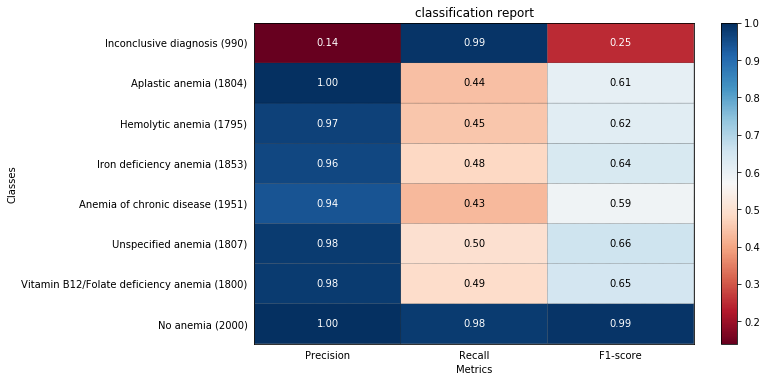

In [23]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

In [24]:
# def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
#     from sklearn.metrics import confusion_matrix
#     cm = confusion_matrix(y_actual, y_pred)
#     cm_df = pd.DataFrame(cm, index = [0, 1, 2, 3, 4, 5, 6], columns = [0, 1, 2, 3, 4, 5, 6], dtype='object')
#     #cm_df = pd.DataFrame(cm, index = constants.CLASS_DICT.keys(), columns = constants.CLASS_DICT.keys())
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm_df, annot=True)
#     plt.title('Confusion Matrix')
#     plt.ylabel('Actual Anemia')
#     plt.xlabel('Predicted Anemia')
#     plt.tight_layout()
#     if save:
#         plt.savefig(filename)
#     plt.show()
#     plt.close()

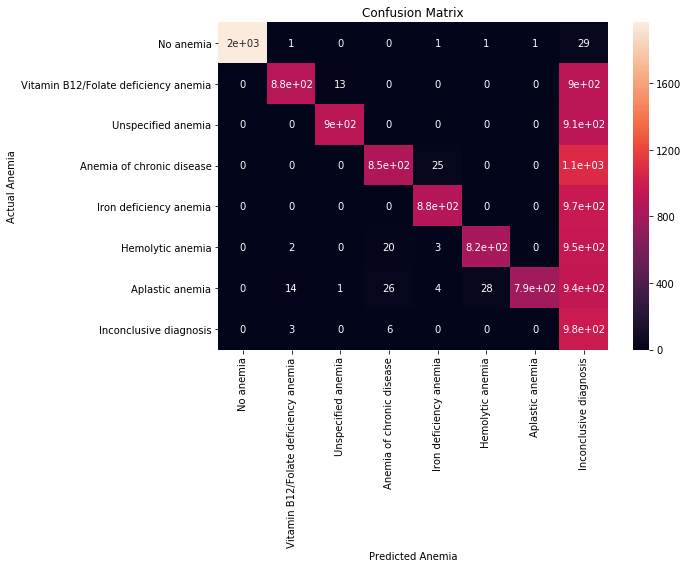

In [25]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])